In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet


In [60]:
import statsmodels.api as sm
from scipy import stats
from pandas import tseries


In [61]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [62]:
plt.style.use("seaborn-whitegrid")

In [63]:
df=pd.read_csv('all_stocks_5yr.csv')

In [64]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [65]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [66]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [67]:
df = df.rename(columns={'Name': 'Ticks'})


In [68]:
df.head()

,date,open,high,low,close,volume,Ticks
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [69]:
G= df.loc[df['Ticks'] == 'GOOGL']

In [70]:
G.head()

,date,open,high,low,close,volume,Ticks
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [71]:
G.tail()

,date,open,high,low,close,volume,Ticks
251562,2018-02-01,1175.99,1187.45,1169.36,1181.59,3675709,GOOGL
251563,2018-02-02,1127.42,1131.30,1111.17,1119.20,5892122,GOOGL
251564,2018-02-05,1100.61,1114.99,1056.74,1062.39,4177469,GOOGL
251565,2018-02-06,1033.98,1087.38,1030.01,1084.43,3831524,GOOGL
251566,2018-02-07,1084.97,1086.53,1054.62,1055.41,2597094,GOOGL


In [72]:
G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 250308 to 251566
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Ticks     1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [73]:
G.head()

,date,open,high,low,close,volume,Ticks
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [74]:
G_df=G.copy()

In [75]:
G_df.loc[:, 'date'] = pd.to_datetime(G.loc[:,'date'], format="%Y/%m/%d")


In [76]:
G_df.head()

,date,open,high,low,close,volume,Ticks
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [77]:
G_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 250308 to 251566
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Ticks     1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


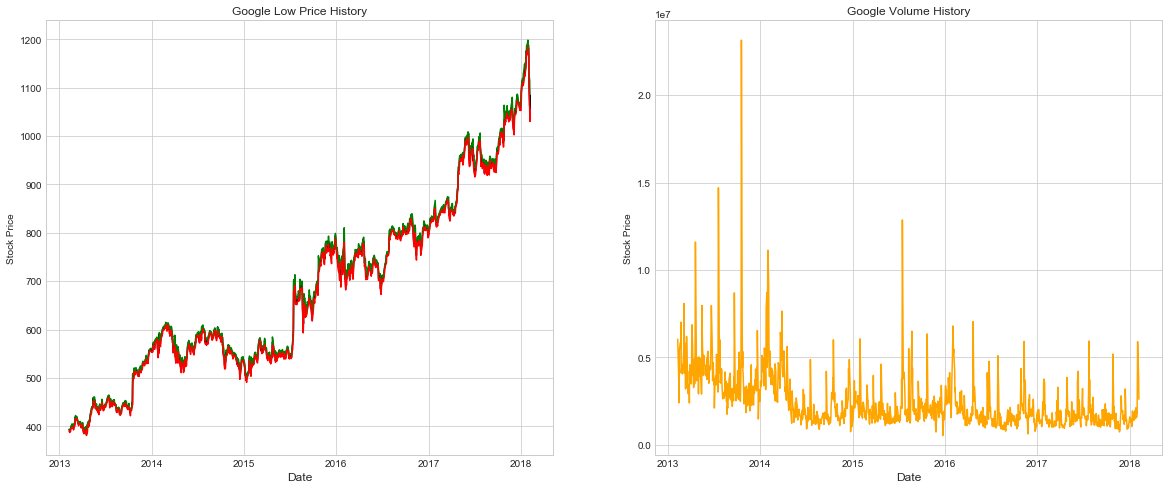

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.plot(G_df["date"], G_df["close"], color="black")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google Close Price History")

ax1.plot(G_df["date"], G_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google High Price History")


ax1.plot(G_df["date"], G_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google Low Price History")

ax2.plot(G_df["date"], G_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Google Volume History")
plt.show()

Text(0.5, 1.0, 'Google Close Price History')

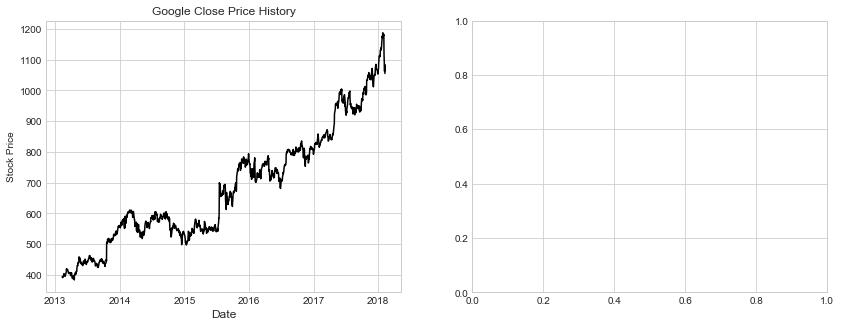

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(G_df["date"], G_df["close"], color='Black')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google Close Price History")

Text(0.5, 1.0, 'Google High Price History')

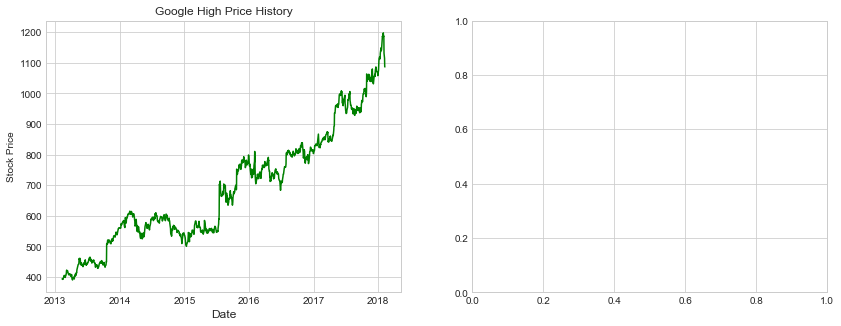

In [80]:
f,(ax1, ax2)=plt.subplots(1, 2, figsize=(14,5))
ax1.plot(G_df["date"], G_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google High Price History")

Text(0.5, 1.0, 'Google Volume History')

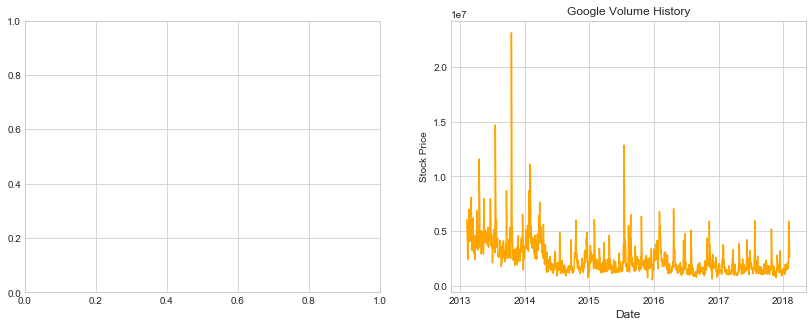

In [81]:
f,(ax1, ax2)=plt.subplots(1, 2, figsize=(14,5))
ax2.plot(G_df["date"], G_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Google Volume History")

Text(0.5, 1.0, 'Google Low Price History')

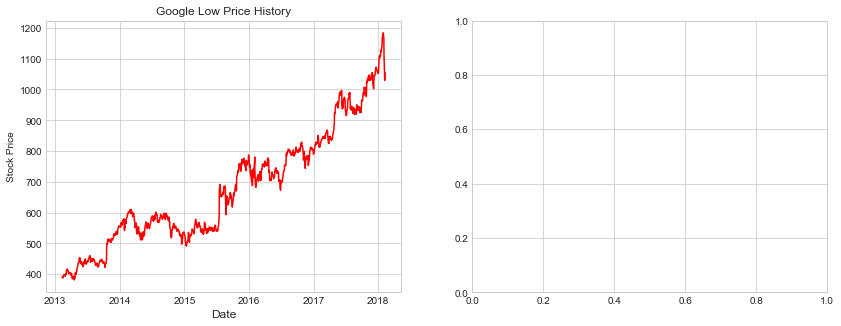

In [82]:
f,(ax1, ax2)=plt.subplots(1, 2, figsize=(14,5))

ax1.plot(G_df["date"], G_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google Low Price History")


In [83]:
m = Prophet()

# Drop the columns
ph_df = G_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
250308,2013-02-08,393.0777
250309,2013-02-11,391.6012
250310,2013-02-12,390.7403
250311,2013-02-13,391.8214
250312,2013-02-14,394.3039


In [84]:
m = Prophet()

m.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
##forecast = m.predict(future_prices)
##forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_prices.head()

,ds
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14


In [86]:
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,1384.141140,1226.411963,1557.774198
1620,2019-02-04,1381.258084,1225.642111,1546.926328
1621,2019-02-05,1381.422357,1224.548861,1549.298454
1622,2019-02-06,1381.827684,1233.016886,1550.078056
1623,2019-02-07,1380.975181,1227.079170,1551.418524


In [87]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-02-08,389.451336,356.532669,423.165156
1,2013-02-11,388.990728,357.791197,421.664417
2,2013-02-12,389.533237,357.795223,422.490859
3,2013-02-13,390.406983,358.617711,420.242546
4,2013-02-14,390.095577,359.439099,423.144333


In [88]:
###import matplotlib.dates as mdates
##starting_date = dt.datetime(2018, 4, 7)
##starting_date1 = mdates.date2num(starting_date)
##trend_date = dt.datetime(2018, 6, 7)
##trend_date1 = mdates.date2num(trend_date)
##pointing_arrow = dt.datetime(2018, 2, 18)
##pointing_arrow1 = mdates.date2num(pointing_arrow)


##fig = m.plot(forecast)
###ax1 = fig.add_subplot(111)
##ax1.set_title("Google Stock Price Forecast", fontsize=16)
##ax1.set_xlabel("Date", fontsize=12)
##ax1.set_ylabel("Close Price", fontsize=12)
##ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
  ##          arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
    ##        )
##ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
    #        arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
  ##          )
##ax1.axhline(y=1260, color='b', linestyle='-')

##plt.show()


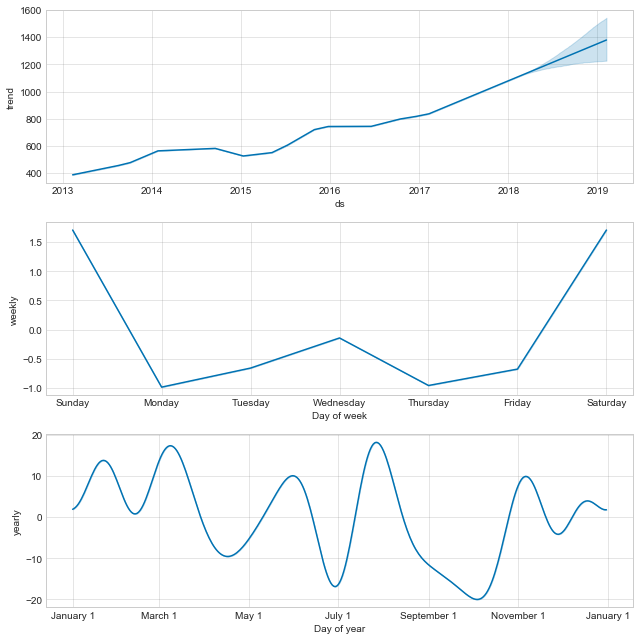

In [89]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


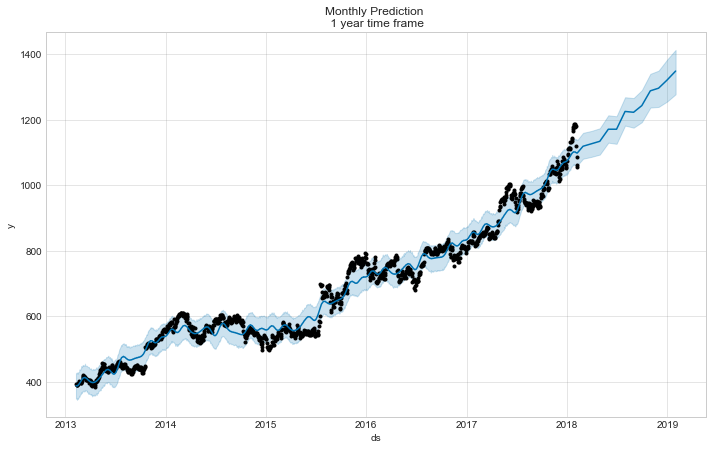

In [90]:
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

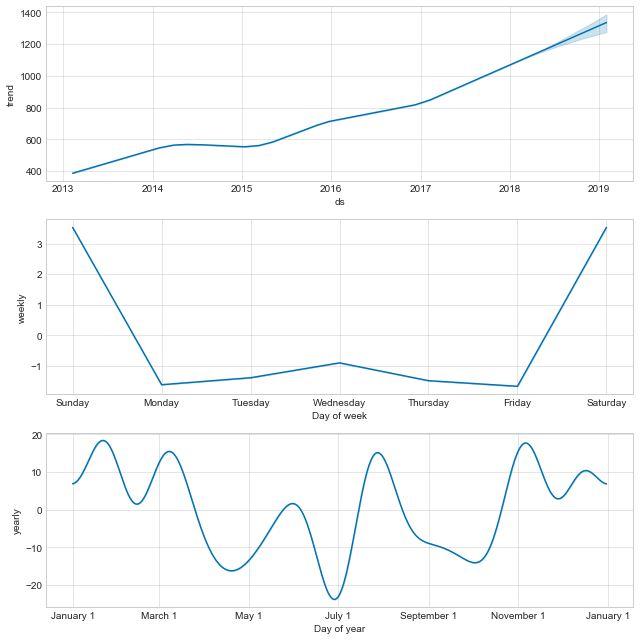

In [91]:
fig = m.plot_components(fcst)
plt.show()

In [145]:
claim = 'Pluto is a Planet'
words = claim.split()
words

['Pluto', 'is', 'a', 'Planet']

In [144]:
datestr = '1956-01-31'
year, month, day = datestr.split('-')


In [146]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [181]:
str='abcdef'
str='ABCDEF'
#isnumeric(str)
str.isnumeric()
str.lower()
str.swapcase()
str.casefold()
str.capitalize()
for i, doc in str:
    tokens=str.split()
print(tokens)

ValueError: not enough values to unpack (expected 2, got 1)

In [225]:
def word_search(doc_list, keyword):
    for word in doc_list:
        tokens = word.split()
        list_1 = [token.rstrip('.,').lower() for token in tokens]
        print(list_1)
    for x in list_1:
        if  x == keyword:
            return True
        else:
            return False
    
            
        
        
    
    
doc_list = ["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"]
word_search(doc_list, 'casino')


['the', 'learn', 'python', 'challenge', 'casino']
['they', 'bought', 'a', 'car']
['casinoville']


False

In [228]:
import matplotlib as mt
dir(mt.graph)


AttributeError: module 'matplotlib' has no attribute 'graph'